This code is to see how many people have been vaccinated and in which countries

In [13]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

col_list = ["country", "total_vaccinations","people_vaccinated_per_hundred", "vaccines"]

df = pd.read_csv("covid_19_vaccination.csv", usecols=col_list)

df.head(100)

,country,total_vaccinations,people_vaccinated_per_hundred,vaccines
0,Albania,0.0,0.00,Pfizer/BioNTech
1,Albania,NaN,NaN,Pfizer/BioNTech
2,Albania,128.0,0.00,Pfizer/BioNTech
3,Albania,188.0,0.01,Pfizer/BioNTech
4,Albania,266.0,0.01,Pfizer/BioNTech
...,...,...,...,...
95,Andorra,NaN,NaN,Pfizer/BioNTech
96,Andorra,NaN,NaN,Pfizer/BioNTech
97,Andorra,NaN,NaN,Pfizer/BioNTech
98,Andorra,NaN,NaN,Pfizer/BioNTech


This how I cleaned the table in terms of total vaccinations

In [9]:
group1_df = df.dropna(subset=['total_vaccinations'], axis=0).groupby(['country']).sum()

num_1 = df.groupby(['country']).size()

group2_df = group1_df

group2_df['people_vaccinated_per_hundred'] = group2_df.apply(lambda x: x['people_vaccinated_per_hundred']/num_1, axis=1)

group2_df.head(10)

,total_vaccinations,people_vaccinated_per_hundred
country,,
Albania,31129.0,0.010638
Algeria,75030.0,0.000000
Andorra,9056.0,0.249362
Anguilla,4103.0,0.581915
Argentina,19537827.0,0.612553
Australia,76844.0,0.006383
Austria,12939692.0,1.931064
Azerbaijan,65000.0,0.013617
Bahrain,9815940.0,12.274468


Text(0.5, 1.0, 'COVID-19 Vaccination By The Numbers')

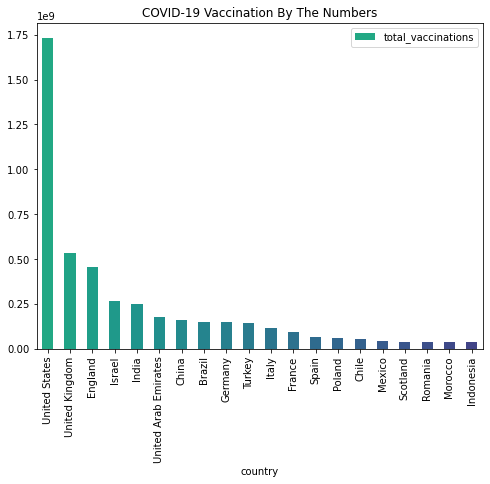

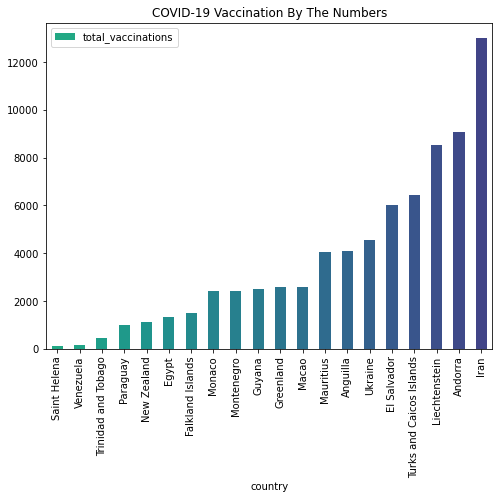

In [8]:
largest_df = group1_df.nlargest(20, 'total_vaccinations')

smallest_df = group1_df.nsmallest(20, 'total_vaccinations')

color = cm.viridis_r(np.linspace(.4, .8, 20))

largest_df.plot(y='total_vaccinations', kind='bar', stacked=True, color=color, legend=True, figsize=(8, 6))

plt.title('COVID-19 Vaccination By The Numbers')

smallest_df.plot(y='total_vaccinations', kind='bar', stacked=True, color=color, legend=True, figsize=(8, 6))

plt.title('COVID-19 Vaccination By The Numbers')

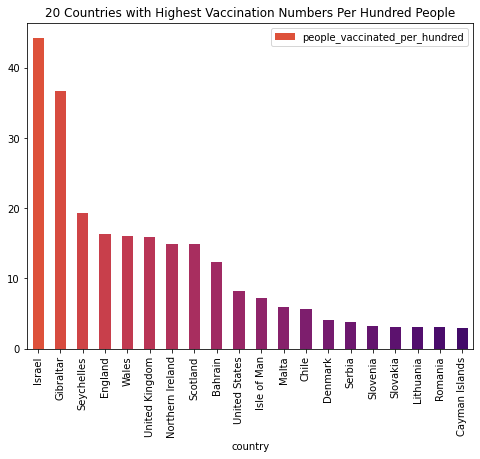

In [10]:
largest_df = group2_df.nlargest(20, 'people_vaccinated_per_hundred')

color = cm.inferno_r(np.linspace(.4, .8, 20))

largest_df.plot(y='people_vaccinated_per_hundred', kind='bar', stacked=True, color=color, legend=True, figsize=(8, 6))

plt.title('20 Countries with Highest Vaccination Numbers Per Hundred People')

In [36]:
group3_df = df

replace_df = group3_df.replace(regex="Pfizer/BioNTech", value="Pfizer", inplace=True)
replace_df = group3_df.replace(regex="Oxford/AstraZeneca", value="AstraZeneca", inplace=True)
replace_df = group3_df.replace(regex="Sinopharm/Beijing", value="SinoVac", inplace=True)
replace_df = group3_df.replace(regex="Sinopharm/Beijing", value="SinoVac", inplace=True)
replace_df = group3_df.replace(regex="Moderna, Oxford/AstraZeneca, Pfizer/BioNTech", value="Moderna, AstraZeneca, Pfizer", inplace=True)
replace_df = group3_df.replace(regex="Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V", value="Pfizer, Sinopharm, Sputnik V", inplace=True)
replace_df = group3_df.replace(regex="Oxford/AstraZeneca, Sinovac", value="AstraZeneca, SinoVac", inplace=True)
replace_df = group3_df.replace(regex="Moderna, Pfizer/BioNTech", value="Moderna, Pfizer", inplace=True)
replace_df = group3_df.replace(regex="Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac", value="SinoVac", inplace=True)
replace_df = group3_df.replace(regex="Pfizer/BioNTech, Sinovac", value="Pfizer, SinoVac", inplace=True)
replace_df = group3_df.replace(regex="Oxford/AstraZeneca, Pfizer/BioNTech", value="AstraZeneca, Pfizer", inplace=True)
replace_df = group3_df.replace(regex="Oxford/AstraZeneca, Sinopharm/Beijing", value="AstraZeneca, SinoVac", inplace=True)
replace_df = group3_df.replace(regex="Sinovac", value="SinoVac", inplace=True)
replace_df = group3_df.replace(regex="SinoVac, SinoVac", value="SinoVac", inplace=True)
replace_df = group3_df.replace(regex="", value="")

replace_df = replace_df.dropna(subset=['total_vaccinations'], axis=0)

num_2 = replace_df.groupby(['vaccines']).size()

replace_df['people_vaccinated_per_hundred'] = replace_df.apply(lambda x: x['people_vaccinated_per_hundred']/num_2, axis=1)

replace_df = replace_df.groupby(['vaccines']).sum().sort_values(by=['total_vaccinations'], ascending=False)

replace_df.head(100)

,total_vaccinations,people_vaccinated_per_hundred
vaccines,,
"Moderna, Pfizer",2.081182e+09,23.321967
"AstraZeneca, Pfizer",1.078391e+09,35.358525
"Moderna, AstraZeneca, Pfizer",6.449718e+08,16.093770
SinoVac,3.440351e+08,0.938934
"Covaxin, AstraZeneca",2.517841e+08,0.141066
"AstraZeneca, SinoVac",1.916365e+08,8.482377
"AstraZeneca, Pfizer, SinoVac, Sputnik V",1.765591e+08,0.357787
"Pfizer, SinoVac",5.253410e+07,2.196639
"AstraZeneca, Pfizer, Sputnik V",4.141241e+07,0.217377


Text(0.5, 1.0, 'Countries with Different Types of Vaccines')

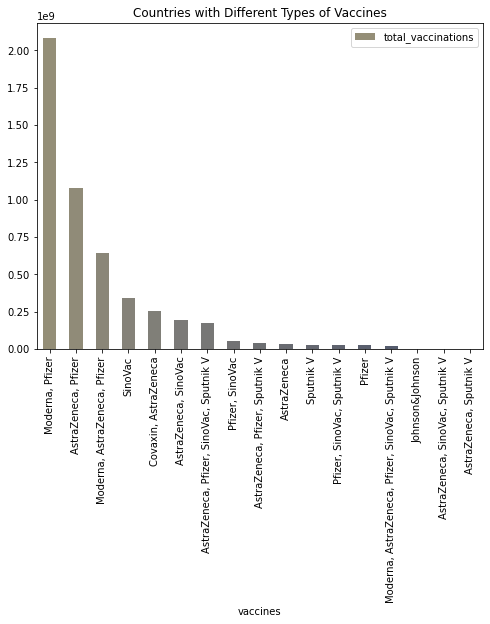

In [33]:
color = cm.cividis_r(np.linspace(.4, .8, 20))

replace_df.plot(y='total_vaccinations', kind='bar', stacked=True, color=color, legend=True, figsize=(8, 6))

plt.title('Countries with Different Types of Vaccines')

Text(0.5, 1.0, 'Countries with Different Types of Vaccines')

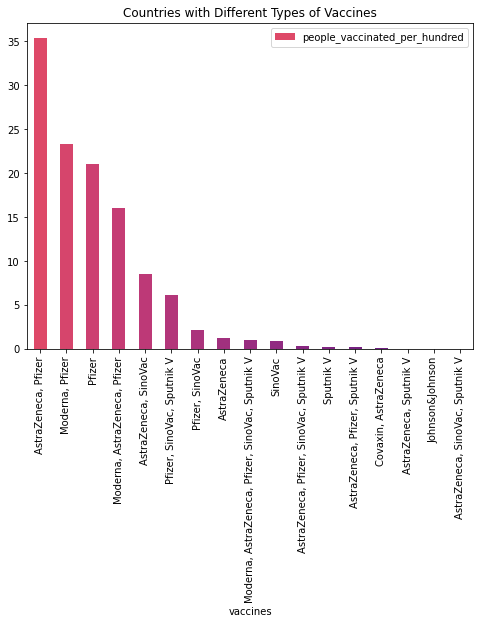

In [45]:
vaccines_df = replace_df.groupby(['vaccines']).sum().sort_values(by=['people_vaccinated_per_hundred'], ascending=False)

color = cm.magma_r(np.linspace(.4, .8, 20))

vaccines_df.plot(y='people_vaccinated_per_hundred', kind='bar', stacked=True, color=color, legend=True, figsize=(8, 6))

plt.title('Countries with Different Types of Vaccines')